## Importing Necessary Libralies

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import os
import sys

project_root = os.getenv("PROJECT_ROOT")
if project_root is None:
    project_root = r"C:\Users\saisu\OneDrive\Desktop\GitHub Repos\SmartML-Opt-Self-Balancing-AutoML-Framework-for-Imbalanced-Data"

sys.path.append(project_root)





## 1. Introduction


## 1.1 Project Overview


In [39]:
from src.ingest import load_data

df = load_data(path=os.path.join(project_root, "data", "bank.csv"))


In [40]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [41]:
print(df.shape)

(4521, 17)


### My Note:
- Dataset contains 45211 entries and 17 columns.

- Target variable: y (indicates if a customer subscribed to a term deposit).

- Goal: Predict likelihood of subscription using classification models.

- This dataset is ideal for binary classification. I plan to build and evaluate multiple models to select the best-performing one for deployment.

# 2. Data Understanding


## 2.1 Dataset Information


In [42]:
print(df.duplicated().sum())

0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### My Note:

- 7 numerical and 10 categorical columns

- No missing or null values

- No duplicate rows

- The dataset is clean and complete, which saves preprocessing effort. The mix of categorical and numerical data will be handled accordingly during encoding and scaling.



## 2.2 Sample Data Review


In [44]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### My Note:

- Used df.head() to view the first few records.

- Initial rows helped me understand each column. Some columns like job, education, and poutcome seem to have a strong influence on the target and should be considered carefully.



# 3. Exploratory Data Analysis (EDA)


## 3.1 Target Variable Distribution


In [45]:
print(round(df['y'].value_counts(normalize=True)*100,1))

y
no     88.5
yes    11.5
Name: proportion, dtype: float64


### My Note:
- Found the data is imbalanced (more "no" than "yes").

- This imbalance can affect model performance, especially recall. I’ve planned to use SMOTE to address this before model training.

## 3.2 Statistical Summary


In [46]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### My Note:
- Used describe() to explore distributions, min, max, etc.

- Found high variation in balance and duration, which may indicate outliers. Also, pdays has a lot of -1 values which might represent missing contact.

## 3.3 Data Visualization

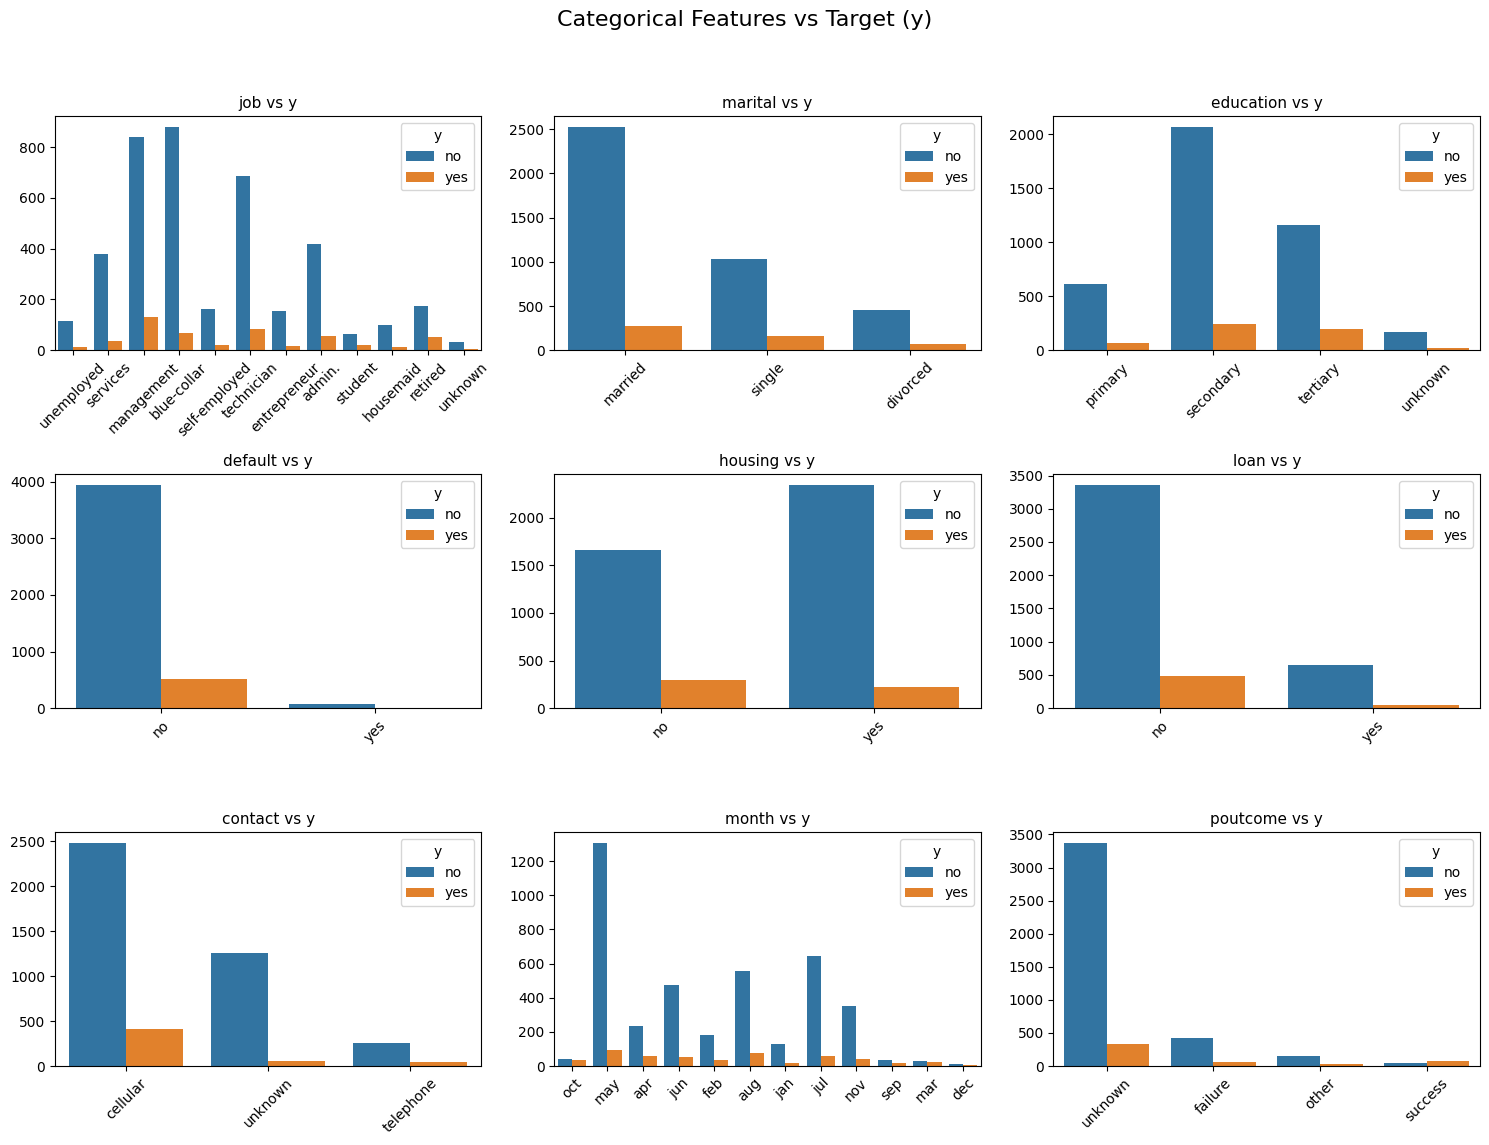

In [47]:
n_cols = 3
n_rows = 3
plt.figure(figsize=(n_cols * 5, n_rows * 4))  
categorical_cols= ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for idx, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.countplot(data=df, x=col, hue="y")
    plt.title(f'{col} vs y', fontsize=11)
    plt.xticks(rotation=45)
    plt.xlabel("")
    plt.ylabel("")

plt.suptitle("Categorical Features vs Target (y)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

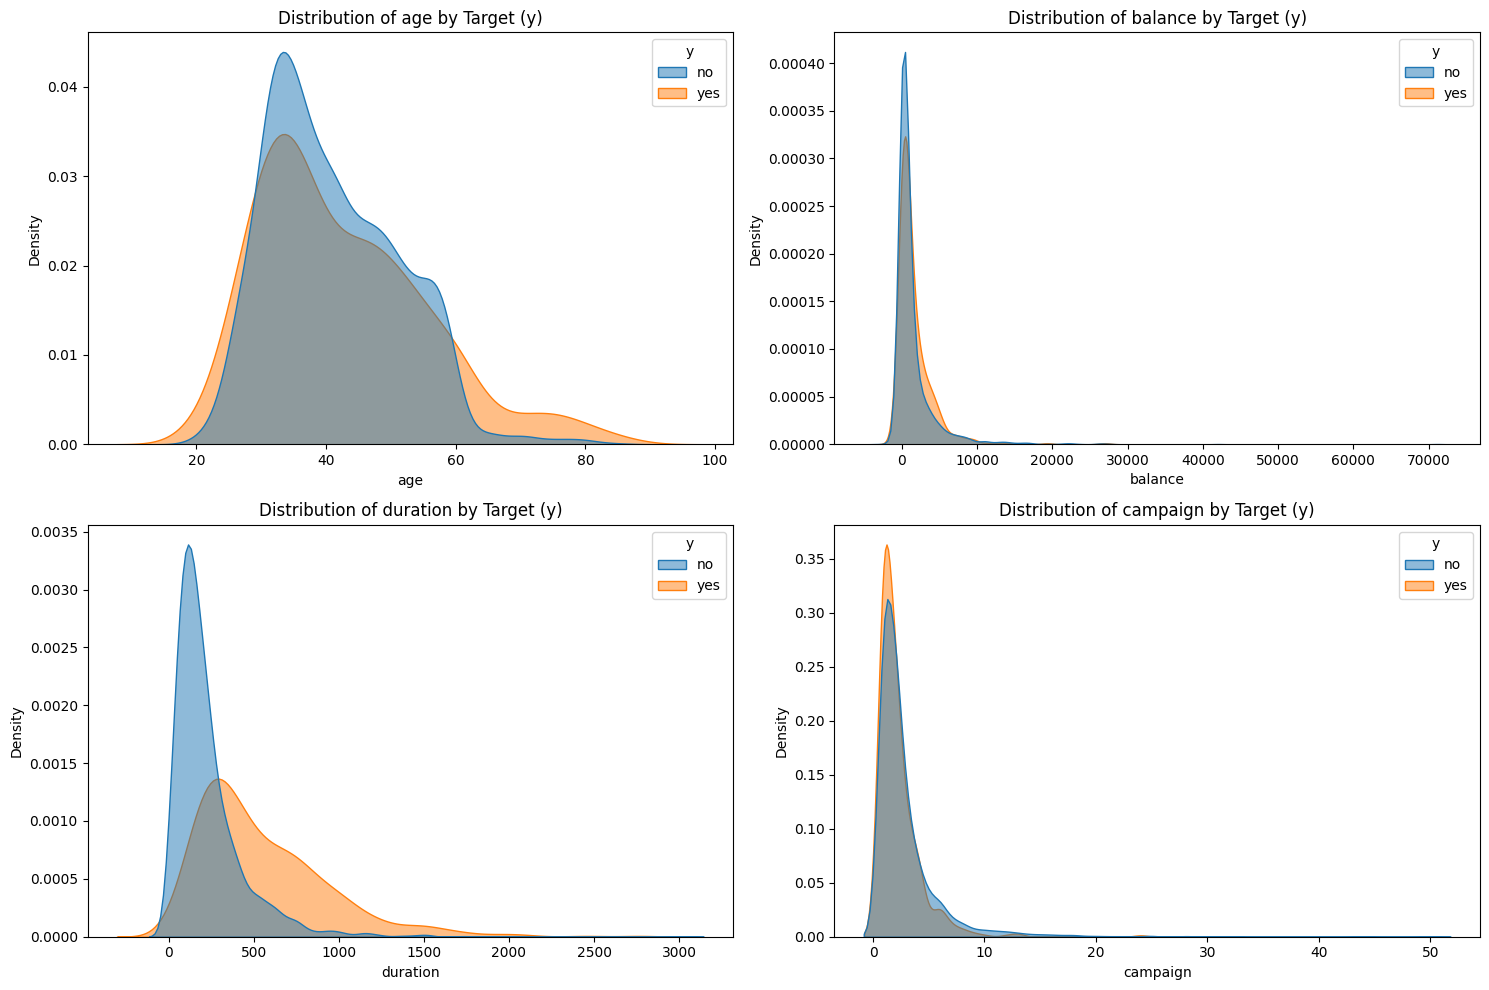

In [48]:

numerical_columns = ["age", "balance", "duration", "campaign"]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2x2 grid for 4 plots
axes = axes.flatten()  # flatten to access via a simple loop

for i, col in enumerate(numerical_columns):
    sns.kdeplot(data=df, x=col, hue='y', fill=True, common_norm=False, alpha=0.5, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Target (y)', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Density", fontsize=10)

plt.tight_layout()
plt.show()


### Categorical Features vs Target (`y`)

#### `job` vs `y`:
- **Observation**:
  - Management, technician, and blue-collar dominate both responses.
  - Students and retired individuals, although fewer in number, show relatively higher "yes" response rates.
- **My Note**:
  - Occupation is an important segmenting variable. Student and retired groups may have higher availability or interest and can be targeted specifically.

---

#### `marital` vs `y`:
- **Observation**:
  - Single individuals show a better response ("yes") ratio than married or divorced groups.
- **My Note**:
  - Relationship status influences engagement; singles may be more responsive due to different financial or personal circumstances.

---

#### `education` vs `y`:
- **Observation**:
  - Higher education levels (tertiary) are associated with more "yes" responses.
- **My Note**:
  - Campaigns might benefit from tailoring messaging by education level. More technical language may work better for tertiary-educated clients.

---

#### `default`, `housing`, `loan` vs `y`:
- **Observation**:
  - Most people who responded "yes" have **no defaults**, **no housing loans**, and **no personal loans**.
- **My Note**:
  - Financially stable individuals are more likely to subscribe. Filtering such leads may improve targeting efficiency.

---

#### `contact` vs `y`:
- **Observation**:
  - Cellular contact has the highest success rate compared to telephone or unknown.
- **My Note**:
  - Prioritize cellular communication in future campaigns. Drop "unknown" contact types if possible.

---

#### `month` vs `y`:
- **Observation**:
  - May, June, August have higher contact volume, but success is more likely in March, December, and October.
- **My Note**:
  - Review performance per month and consider redistributing outreach efforts based on effectiveness instead of volume.

---

#### `poutcome` vs `y`:
- **Observation**:
  - Past outcomes labeled as "success" show the highest conversion, while "unknown" or "failure" show low performance.
- **My Note**:
  - Clients with a history of successful past campaigns are more likely to convert again. Leverage previous campaign data for segmentation.

---

### Other Numeric Features

#### `age` vs `y`:
- **Observation**:
  - Subscriptions are common in both mid-30s to early-40s and also 60+.
- **My Note**:
  - Target both middle-aged professionals and retired individuals, as both have distinct peaks in positive responses.

---

#### `balance` vs `y`:
- **Observation**:
  - Higher account balances are slightly more associated with positive responses, though not a strong trend.
- **My Note**:
  - While not a strong standalone predictor, it can still help in ranking or prioritizing leads.

---

#### Overall Summary from EDA

- Duration and campaign count are two of the strongest features influencing client conversion.
- Categorical features like job, education, and poutcome show clear trends worth integrating into modeling.
- Smarter segmentation and contact strategies can drastically improve marketing efficiency.



# 4. Correlation Analysis


In [36]:
df[["age","balance","duration","campaign"]].corr()

,age,balance,duration,campaign
age,1.000000,0.092241,-0.011520,0.015961
balance,0.092241,1.000000,0.026523,-0.016860
duration,-0.011520,0.026523,1.000000,-0.085467
campaign,0.015961,-0.016860,-0.085467,1.000000


### My Note:

- Checked correlation matrix for numerical columns.

- Example:
- age-balance: 0.12  
- duration-campaign: -0.10  

- Low correlation values indicate no strong multicollinearity. However, duration seems important — possibly a key predictor of success.